In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = load_iris()
X_data = data.data
print(X_data.shape)
Y_data = data.target
print(Y_data.shape)

(150, 4)
(150,)


In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, random_state= 5)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
result_K= []
for k in range(1, 15 ,2):
    neigh = KNeighborsClassifier(k)
    neigh.fit(X_train, Y_train)
    cv_predict = neigh.predict(X_test)
    result_cv = cv_predict - Y_test
    # count zeros in 1d array
    n_zeros = np.count_nonzero(result_cv== 0)
    acc = n_zeros / len(Y_test)
    print(acc)
    result_K.append([acc, k])
print(result_K)

0.9210526315789473
0.9473684210526315
0.9473684210526315
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
[[0.9210526315789473, 1], [0.9473684210526315, 3], [0.9473684210526315, 5], [0.9736842105263158, 7], [0.9736842105263158, 9], [0.9736842105263158, 11], [0.9736842105263158, 13]]


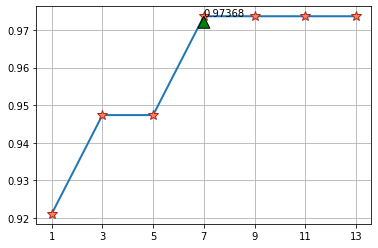

In [5]:
import pandas as pd
df = pd.DataFrame(result_K, columns=['accuracy','k'])
df.head()
plt.plot(df['k'],df['accuracy'], marker = '*', ms= 10, mec= '#A52A2A', mfc= '#FF7F50', lw=2)
plt.grid()
plt.xticks(np.arange(1,14,2), np.arange(1,14,2))
ymax = df['accuracy'].max()
ymax
ymaxStr = str(round(ymax,5))
# ymaxStr = ('best k ',ymaxStr)
xpos = df.loc[df['accuracy']== ymax]['k'].reset_index()
xpos = xpos['k'][0]
xmax = xpos
# xpos
plt.annotate(ymaxStr, xy=(xmax, ymax), xytext= (xmax, ymax), arrowprops=dict(facecolor='green'))
plt.show()

# show Max Revenue point

